In [2]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
from cycler import cycler
from pywaffle import Waffle
import numpy as np
%matplotlib inline 

In [3]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

In [5]:
df = pd.read_csv('smith_crown_scraped_8_18_2018.csv')
df.head()

,end_date,name,raised,start_date,summary
0,09/30/18,Infinitus Token,NaN,08/18/18,A smart designation repository for lost cryptoasset keys.
1,09/30/18,SharkGate Token,NaN,08/18/18,A decentralized cyber security platform.
2,09/30/18,Lancer Network,NaN,08/18/18,A freelancing site for promotion of blockchain crowdsale projects.
3,09/30/18,MillionCoin,NaN,08/18/18,A cryptoasset exchange and analytics platform.
4,08/14/18,Hedera Hashgraph,"$20,000,000",08/01/18,"A smart contract platform based on the hashgraph consensus mechanism, emphasizing scalability and security through an asynchronous Byzantine fault tolerant architecture."


In [6]:
# df.shape (127, 5)
df.dtypes

end_date      object
name          object
raised        object
start_date    object
summary       object
dtype: object

In [7]:
df['raised_float'] = df.raised.replace('\D', '', regex=True).astype(float)

In [8]:
df.raised_float.sum()
# $2.7 billion has been raised in completed ICOs (curated by Smith + Crown)

2697479931.0

In [11]:
#09/30/18
df['start_date_dt'] = pd.to_datetime(df.start_date, format="%m/%d/%y")
df['end_date_dt'] = pd.to_datetime(df.end_date, format="%m/%d/%y")

In [13]:
df.head()

,end_date,name,raised,start_date,summary,raised_float,end_date_dt,start_date_dt
0,09/30/18,Infinitus Token,NaN,08/18/18,A smart designation repository for lost cryptoasset keys.,NaN,2018-09-30,2018-08-18
1,09/30/18,SharkGate Token,NaN,08/18/18,A decentralized cyber security platform.,NaN,2018-09-30,2018-08-18
2,09/30/18,Lancer Network,NaN,08/18/18,A freelancing site for promotion of blockchain crowdsale projects.,NaN,2018-09-30,2018-08-18
3,09/30/18,MillionCoin,NaN,08/18/18,A cryptoasset exchange and analytics platform.,NaN,2018-09-30,2018-08-18
4,08/14/18,Hedera Hashgraph,"$20,000,000",08/01/18,"A smart contract platform based on the hashgraph consensus mechanism, emphasizing scalability and security through an asynchronous Byzantine fault tolerant architecture.",20000000.0,2018-08-14,2018-08-01


In [15]:
df_end_2018 = df[df.end_date_dt >= '2018-01-01']

In [25]:
df_end_2017 = df[(df.end_date_dt >= '2017-01-01') & (df.end_date_dt <= '2017-12-31')]

In [26]:
#df_end_2018.head()
df_end_2017.head()

,end_date,name,raised,start_date,summary,raised_float,end_date_dt,start_date_dt
40,12/20/17,Aelf,"$40,000,000",11/28/17,A DPoS smart contract platform offering interoperability and data storage features.,40000000.0,2017-12-20,2017-11-28
41,12/20/17,Commerceblock,"$8,355,121",11/28/17,"A technology platform with a combination of trust minimized trade, decentralized contract execution, on-chain derivatives, and asset backed token issuance for public blockchains.",8355121.0,2017-12-20,2017-11-28
42,12/20/17,Miniapps,"$5,300,000",10/18/17,A chatbot platform and smart contract-based app marketplace.,5300000.0,2017-12-20,2017-10-18
43,12/05/17,Leverj,"$15,280,640",11/07/17,A decentralized cryptocurrency futures exchange.,15280640.0,2017-12-05,2017-11-07
44,12/05/17,WaBi,"$11,500,000",11/28/17,A chip-based product verification sticker designed to link physical consumer goods with blockchain identities,11500000.0,2017-12-05,2017-11-28


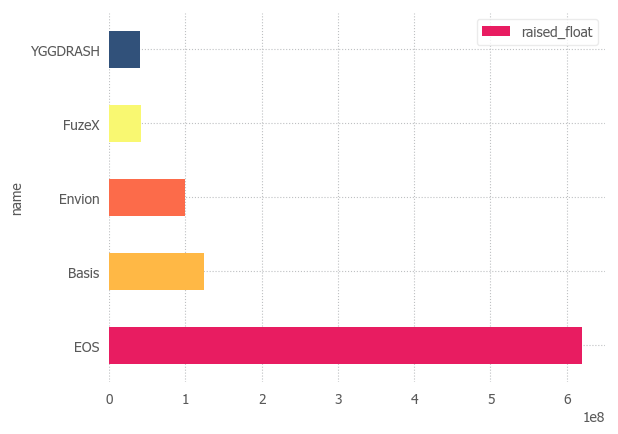

In [56]:
df_end_2018.sort_values(by='raised_float', ascending=False).head().plot(kind='barh', x='name', y='raised_float')
plt.show()

In [43]:
df.resample('A', on='end_date_dt').sum()

,raised_float
end_date_dt,
2016-12-31,5.773459e+08
2017-12-31,6.152844e+08
2018-12-31,1.504850e+09


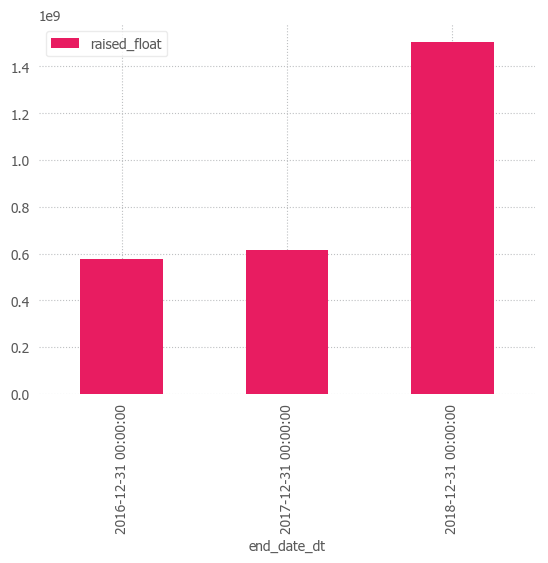

In [42]:
df.resample('A', on='end_date_dt').sum().plot(kind='bar')
plt.show()

In [58]:
df_end_2018.raised_float.sum()

1504849575.0